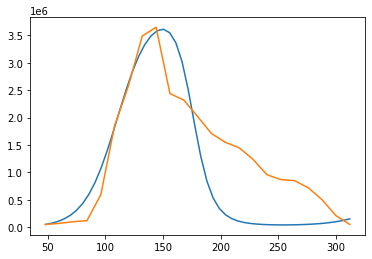

In [26]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

traindata=pd.read_csv('cellgrowth.csv')

def odefunc(f,t): #defines the function for the ode equations to be used in the ode solver 
    A= f[0] #from the input array (in odeint) the first value is the n and the second is the c
    Ad= f[1]
#     C=f[2]
    r=0.07
    K=4e6
    mua=3.7e-8
    muac=0.018
    a=2e3
    d=0.017
    muca=muac*10
    muc=0.462
    func=[r*A*(1-(A/K))-mua*A*Ad,mua*A*Ad-d*Ad]
    return func

t_steps= np.linspace(48,312)

ic=[5e4,3000]
# time=[int(i.replace(",","")) for i in traindata['Time'] ]
exp1=[int(i.replace(",","")) for i in traindata['Exp1'] ]

# #converts the training data n and c columns to an array to be used in the RMSE function
# traindata1=traindata.iloc[1:,1].to_numpy()
ODE_output = odeint(odefunc, ic, t_steps);
plt.plot(t_steps,ODE_output[:,0])
plt.plot(traindata["Time"],exp1)